In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import platform

In [4]:
## Paths Input Here
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    conn_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/matrix_corrMx_AvgR.csv'
    clin_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/patient_data/AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/AD_to_memory_net/permutations'
    #out_dir = r'path to out dir here'
    x_roi_names = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Mac style')
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    print(pathlib.Path(os.path.join(base,conn_path)))
    #out_dir = r'path to out dir here'
    x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\AD_to_memory_net\permutations'

I have set pathnames in the Mac style


## Import X Vals

In [5]:
try:
    name_df = pd.read_csv(x_roi_names, names=['arb'], header=None)
    # name_df.tail(5)
    colnames = name_df.arb.values.tolist()
    newname = []
    for name in colnames:
        arb = os.path.basename(name).split('.nii')[0]
        arb = arb[0:8]
        newname.append(arb)
    # print('NAMES: ',newname)

    x_df = pd.read_csv(conn_path, names=newname, header=None)#, ignore_index=True)
    x_df.index = newname
    x_df = x_df.iloc[8:,:8]
    x_df = x_df.reset_index(drop=True)
except:
    print('excepted')
    x_df = pd.read_csv(conn_path)
    colnames = x_df.columns.values
    newname = []
    for name in colnames:
        arb = os.path.basename(name).split('.nii')[0]
        arb = arb[0:8]
        newname.append(arb)
    x_df = x_df.set_axis(newname, axis=1, inplace=False)
    try:
        x_df.pop('Unnamed:')
    except:
        print('no x_df.pop(<name>) column to pop')

corr_df = x_df
display(corr_df)

,00_memor,01_visua,02_somat,03_dorsa,04_ventr,05_limbi,06_front,07_defau
0,0.155809,-0.016067,-0.037287,-0.097985,-0.133136,0.368843,-0.161642,0.050232
1,0.173658,-0.039878,-0.032239,-0.129030,-0.131156,0.465591,-0.171597,0.077686
2,0.191375,-0.032546,-0.036808,-0.118963,-0.139225,0.368452,-0.161276,0.082011
3,0.159578,-0.015783,-0.062662,-0.088505,-0.130241,0.322597,-0.139443,0.039187
4,0.144300,-0.048057,-0.090870,-0.085284,-0.078547,0.215256,-0.057259,0.028220
5,0.197998,-0.022790,-0.044253,-0.106363,-0.144834,0.327426,-0.157877,0.072634
6,0.154363,-0.042301,-0.086612,-0.089494,-0.096292,0.244718,-0.085726,0.031619
7,0.163638,-0.053981,-0.097731,-0.099889,-0.088261,0.232628,-0.065393,0.042303
8,0.239486,-0.064388,-0.052075,-0.148891,-0.134814,0.352712,-0.137391,0.113133
9,0.207923,-0.041962,-0.056562,-0.104225,-0.112208,0.215980,-0.097356,0.076609


In [6]:
#Assess connectivity values fundamentally
corr_description = corr_df.describe().transpose()
display(corr_description)

,count,mean,std,min,25%,50%,75%,max
00_memor,50.0,0.205354,0.044503,0.083375,0.174892,0.205535,0.234225,0.294498
01_visua,50.0,-0.045786,0.023526,-0.104341,-0.063749,-0.042132,-0.029745,0.001312
02_somat,50.0,-0.062143,0.020456,-0.107202,-0.078273,-0.059283,-0.047083,-0.027711
03_dorsa,50.0,-0.117958,0.031914,-0.184950,-0.138649,-0.115135,-0.096726,-0.030816
04_ventr,50.0,-0.116727,0.024494,-0.148808,-0.134395,-0.125414,-0.103286,-0.033823
05_limbi,50.0,0.283589,0.082985,-0.039611,0.245888,0.293108,0.334439,0.465591
06_front,50.0,-0.114568,0.041048,-0.172746,-0.146277,-0.126292,-0.087907,0.018306
07_defau,50.0,0.078468,0.033653,0.002173,0.058477,0.073367,0.097965,0.172278


## Import Y Vals

In [7]:
sheet_name = 'AD_Clinical_Scores'
alphab_cols = 'C, D, E, F, G, J, V'
clin_df = pd.read_excel(clin_path, sheet_name=sheet_name, usecols=alphab_cols, nrows=50)
print('Num NaNs: ', clin_df.isna().sum().sum())
# clin_df.tail(5)
display(clin_df)

Num NaNs:  32


,Randomization Arm,"Patient # CDR, ADAS",Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),% Change from baseline (ADAS-Cog11),% Change from baseline (CDR)
0,sham-stim,101,62,28.0,5.0,-21.428571,-40.000000
1,stim-sham,102,77,22.0,6.5,-36.363636,-69.230769
2,sham-stim,103,76,19.0,7.0,-78.947368,-42.857143
3,stim-sham,104,65,17.0,7.0,-129.411765,-71.428571
4,NaN,105,50,19.0,NaN,-10.526316,NaN
5,stim-sham,106,66,13.0,3.0,-38.461538,-50.000000
6,NaN,107,64,13.0,NaN,-15.384615,NaN
7,NaN,108,60,24.0,NaN,-29.166667,NaN
8,sham-stim,109,72,23.0,9.0,-30.434783,-44.444444
9,sham-stim,110,72,13.0,5.0,-84.615385,-80.000000


In [8]:
## Organize the clinical dataframe
# clin_df = clin_df.sort_values(by=['Patient # CDR, ADAS'], kind='quicksort', axis=0, ascending=True, ignore_index=True)
# clin_df.tail(10)

In [9]:
##One-hot-encode the dataframe | sham=0 stim=1 
shams = (clin_df['Randomization Arm'] == 'sham-stim')
clin_df.loc[shams, 'Randomization Arm'] = 0
stims = (clin_df['Randomization Arm'] == 'stim-sham')
clin_df.loc[stims, 'Randomization Arm'] = 1
clin_df.tail(10)

,Randomization Arm,"Patient # CDR, ADAS",Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),% Change from baseline (ADAS-Cog11),% Change from baseline (CDR)
40,0,141,72,19.0,9.0,0.000000,11.111111
41,1,142,77,18.0,1.0,5.555556,-400.000000
42,0,143,71,16.0,3.0,6.250000,-16.666667
43,1,144,79,13.0,3.0,-61.538462,-133.333333
44,1,145,74,18.0,3.5,5.555556,-100.000000
45,0,146,76,11.0,4.0,-54.545455,-50.000000
46,1,147,59,21.0,3.0,-4.761905,-100.000000
47,1,148,51,13.0,3.5,-207.692308,-157.142857
48,0,149,77,10.0,5.0,-90.000000,-20.000000
49,0,150,71,22.0,4.5,13.636364,0.000000


In [10]:
## Develop Understanding of the Clinical Data
try:
    clin_description = clin_df.describe().transpose()
    display(clin_description)
except:
    print('Failed to describe clinical dataframe, unknown cause')

,count,mean,std,min,25%,50%,75%,max
"Patient # CDR, ADAS",50.0,189.920000,258.695695,101.000000,113.250000,126.500000,140.750000,1203.000000
Age at DOS,50.0,67.480000,7.985293,47.000000,62.000000,69.000000,73.750000,79.000000
Baseline ADAS-Cog11,50.0,19.238000,5.600688,10.000000,15.250000,18.500000,22.000000,35.000000
Baseline CDR (sum of squares),40.0,4.787500,1.727929,1.000000,3.500000,5.000000,5.500000,9.000000
% Change from baseline (ADAS-Cog11),50.0,-35.563519,48.852186,-207.692308,-61.153846,-28.472222,-3.430707,54.545455
% Change from baseline (CDR),38.0,-73.831483,79.163640,-400.000000,-100.000000,-59.615385,-21.250000,11.111111


## Merge Dataframes

In [11]:
corrd_df = corr_df.reset_index()
total_df = pd.concat([clin_df, corr_df], axis=1)
display(total_df)

,Randomization Arm,"Patient # CDR, ADAS",Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),% Change from baseline (ADAS-Cog11),% Change from baseline (CDR),00_memor,01_visua,02_somat,03_dorsa,04_ventr,05_limbi,06_front,07_defau
0,0,101,62,28.0,5.0,-21.428571,-40.000000,0.155809,-0.016067,-0.037287,-0.097985,-0.133136,0.368843,-0.161642,0.050232
1,1,102,77,22.0,6.5,-36.363636,-69.230769,0.173658,-0.039878,-0.032239,-0.129030,-0.131156,0.465591,-0.171597,0.077686
2,0,103,76,19.0,7.0,-78.947368,-42.857143,0.191375,-0.032546,-0.036808,-0.118963,-0.139225,0.368452,-0.161276,0.082011
3,1,104,65,17.0,7.0,-129.411765,-71.428571,0.159578,-0.015783,-0.062662,-0.088505,-0.130241,0.322597,-0.139443,0.039187
4,NaN,105,50,19.0,NaN,-10.526316,NaN,0.144300,-0.048057,-0.090870,-0.085284,-0.078547,0.215256,-0.057259,0.028220
5,1,106,66,13.0,3.0,-38.461538,-50.000000,0.197998,-0.022790,-0.044253,-0.106363,-0.144834,0.327426,-0.157877,0.072634
6,NaN,107,64,13.0,NaN,-15.384615,NaN,0.154363,-0.042301,-0.086612,-0.089494,-0.096292,0.244718,-0.085726,0.031619
7,NaN,108,60,24.0,NaN,-29.166667,NaN,0.163638,-0.053981,-0.097731,-0.099889,-0.088261,0.232628,-0.065393,0.042303
8,0,109,72,23.0,9.0,-30.434783,-44.444444,0.239486,-0.064388,-0.052075,-0.148891,-0.134814,0.352712,-0.137391,0.113133
9,0,110,72,13.0,5.0,-84.615385,-80.000000,0.207923,-0.041962,-0.056562,-0.104225,-0.112208,0.215980,-0.097356,0.076609


In [12]:
#Handle NaNs
total_df = total_df.fillna(method='ffill')
print('Num NaNs: ', total_df.isna().sum().sum())

#Generate metrics for understanding
try:
    total_desc = total_df.describe().transpose()
    total_desc
except:
    print('Failed to generate total metrics, unkown cause')

Num NaNs:  0


## Select Split Vals

In [22]:
#subgrouping by age
metric = '% Change from baseline (ADAS-Cog11)'
metric_val = np.mean(total_df[metric])
print(f'{metric} = {metric_val}')

## Choose variables of interest.
x_name = '00_memor'
z_name = '% Change from baseline (ADAS-Cog11)'

#----------------------------------------------------------------User Inpuots Above

index_one = (total_df[metric] > metric_val) #example, all individuals over 65
index_two = (total_df[metric] <= metric_val) #example, all individuals under/equal to 65

##Example of how to use these indices to manipulate data:
#### clin_df.loc[index_one, '<names of relevant columns>'] = 0 ## can use iloc too. 


#----------------------------------------------------------------User Inpouts below
#set pos?
set_pos=True
if set_pos==True:
    total_df[z_name] = total_df[z_name]+abs(np.mean(total_df[z_name]))
    total_df[x_name] = np.abs(total_df[x_name])
    pos_val='absval'
    print('I will set all z values positive')
else:
    pos_val='nonabsval'
    print('I will set all vals positive')

#permute x and y together (sngl_perm), or separately (dbl perm)?
dbl_perm = False
if dbl_perm == True:
    perm_no='dbl_perm'
    print('I will double perm')
else:
    perm_no='sngl_perm'
    print('I will single perm')
    
total_df.tail(3)

% Change from baseline (ADAS-Cog11) = 344.25757803622975
I will set all z values positive
I will single perm


,Randomization Arm,"Patient # CDR, ADAS",Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),% Change from baseline (ADAS-Cog11),% Change from baseline (CDR),00_memor,01_visua,02_somat,03_dorsa,04_ventr,05_limbi,06_front,07_defau
47,1,148,51,13.0,3.5,516.386367,-157.142857,0.225163,-0.046054,-0.072667,-0.124370,-0.130400,0.302641,-0.127573,0.079391
48,0,149,77,10.0,5.0,634.078675,-20.000000,0.228022,-0.041221,-0.076253,-0.123747,-0.141397,0.323542,-0.139500,0.074099
49,0,150,71,22.0,4.5,737.715038,0.000000,0.282438,-0.094408,-0.085608,-0.171892,-0.103193,0.225186,-0.077495,0.130953


## Perform Analysis

In [23]:
from scipy.stats import pearsonr
x_vals = total_df[x_name]
z_vals = total_df[z_name]
# print(len(x_vals[index_one]))
# print(len(x_vals[index_two]))

r_over, p_over = pearsonr(x_vals[index_one], z_vals[index_one])
r_under, p_under = pearsonr(x_vals[index_two], z_vals[index_two])
outcomes_df = pd.DataFrame({'r_over': r_over, 'p_over': p_over, 'r_under': r_under, 'p_under': p_under, 'index':[0]})

## Perform Permutation for Significance

In [24]:
indices = total_df.index.tolist()
num_perms = 10000
perm_indices = np.zeros(np.shape([len(indices), num_perms]))

r_over_perm = []; p_over_perm = []
r_under_perm = []; p_under_perm = []

for i in range(0, num_perms):
    if dbl_perm==False:
        perm_indices = np.random.permutation(indices)
        r_over_arb, p_over_arb = pearsonr(total_df[x_name].loc[perm_indices[0:16]], total_df[z_name].loc[perm_indices[0:16]])
        r_over_perm.append(r_over_arb); p_over_perm.append(p_over_arb)
        
        r_under_arb, p_under_arb = pearsonr(total_df[x_name].loc[perm_indices[16:]], total_df[z_name].loc[perm_indices[16:]])
        r_under_perm.append(r_under_arb); p_under_perm.append(p_under_arb)
    elif dbl_perm==True:
        x_perm_indices = np.random.permutation(indices)
        z_perm_indices = np.random.permutation(indices)
        r_over_arb, p_over_arb = pearsonr(total_df[x_name].loc[x_perm_indices[0:16]], total_df[z_name].loc[z_perm_indices[0:16]])
        r_over_perm.append(r_over_arb); p_over_perm.append(p_over_arb)
        
        r_under_arb, p_under_arb = pearsonr(total_df[x_name].loc[x_perm_indices[16:]], total_df[z_name].loc[z_perm_indices[16:]])
        r_under_perm.append(r_under_arb); p_under_perm.append(p_under_arb)
    else:
        print('failed')

In [25]:
perm_df = pd.DataFrame({'r_over_perm': r_over_perm, 'p_over_perm': p_over_perm, 'r_under_perm': r_under_perm, 'p_under_perm': p_under_perm})
print(f'Running {num_perms} permutations over {len(indices)} incidences \n outcome: {z_name} \n based on: {x_name} \n split by: {metric}')
perm_df['delta_r'] = perm_df['r_over_perm'] - perm_df['r_under_perm']
perm_df.tail(5)  

Running 10000 permutations over 50 incidences 
 outcome: % Change from baseline (ADAS-Cog11) 
 based on: 00_memor 
 split by: % Change from baseline (ADAS-Cog11)


,r_over_perm,p_over_perm,r_under_perm,p_under_perm,delta_r
9995,0.007216,0.978840,0.085137,0.632128,-0.077921
9996,0.227530,0.396721,0.007751,0.965297,0.219779
9997,-0.166540,0.537596,0.162042,0.359884,-0.328582
9998,-0.530337,0.034576,0.252126,0.150291,-0.782463
9999,-0.031414,0.908055,0.117560,0.507878,-0.148974


## Check Data

There were 10000 permutations identified
The were 8739 permuted observations >% Change from baseline (ADAS-Cog11) occuring below the experiminary value of 0.341741379812972
The were 28 permuted observations <=% Change from baseline (ADAS-Cog11) occuring below the experiminary threshold of -0.2180095878590336
prop perm r under exptl r (>metric):  0.8739
prop perm r under exptl r (<=metric):  0.0028


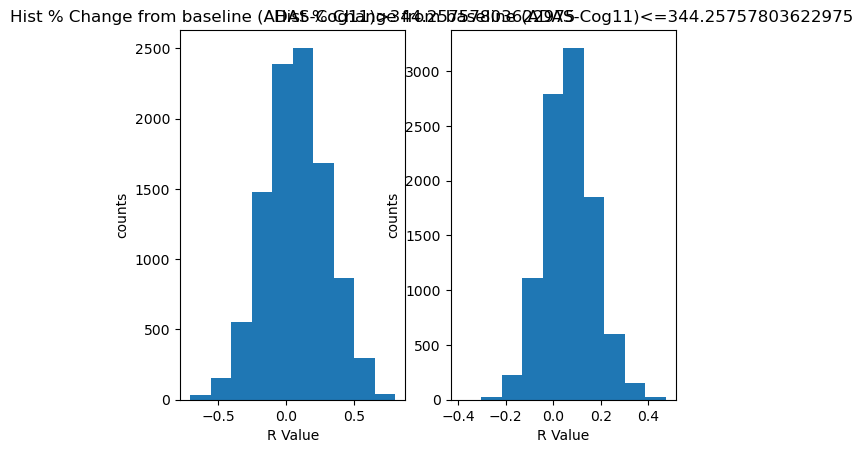

In [26]:
print(f'There were {len(perm_df)} permutations identified')

counts_over = np.count_nonzero(perm_df.r_over_perm[r_over_perm < r_over])#/len(perm_df[:])
counts_under = np.count_nonzero(perm_df.r_under_perm[r_under_perm < r_under])#/len(indices)

print(f'The were {counts_over} permuted observations >{metric} occuring below the experiminary value of {r_over}')
print(f'The were {counts_under} permuted observations <={metric} occuring below the experiminary threshold of {r_under}')

prop_over = counts_over/len(perm_df)
prop_under = counts_under/len(perm_df)
print('prop perm r under exptl r (>metric): ', prop_over)
print('prop perm r under exptl r (<=metric): ', prop_under)

fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.set_title(f'Hist {metric}>{metric_val}')
ax1.set_xlabel('R Value'); ax1.set_ylabel('counts')

ax2 = fig.add_subplot(122);
ax2.set_title(f'Hist {metric}<={metric_val}')
ax2.set_xlabel('R Value'); ax2.set_ylabel('counts')


ax1.hist(perm_df.r_over_perm);
ax2.hist(perm_df.r_under_perm);

/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_10063/4189185050.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(perm_df.r_over_perm, kde=True, bins=100,
/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_10063/4189185050.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

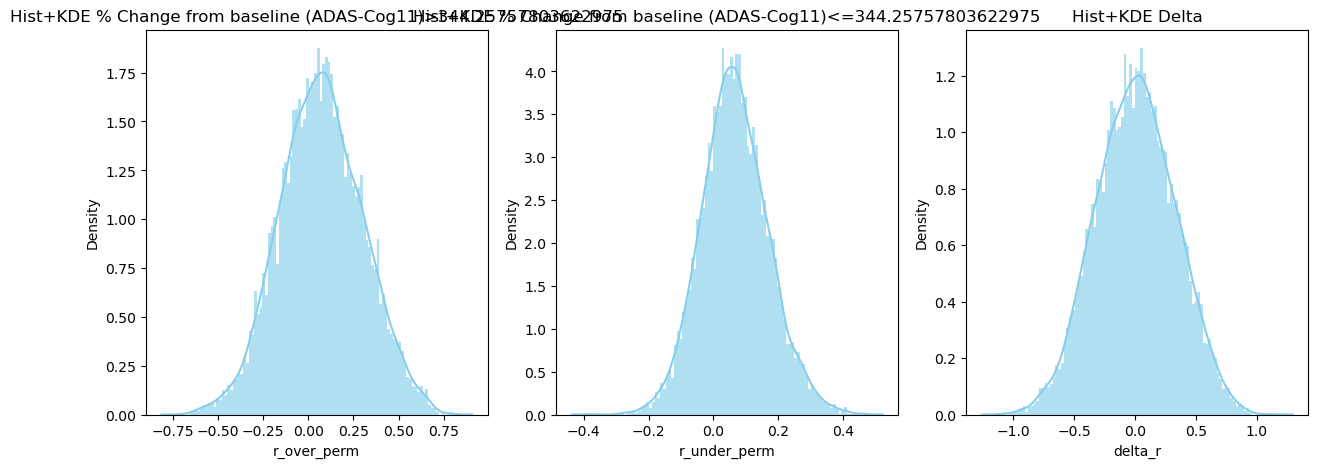

In [27]:
fig2 = plt.figure(figsize= (15,5));
ax1 = fig2.add_subplot(131);
ax1.set_title(f'Hist+KDE {metric}>{metric_val}');
sns.distplot(perm_df.r_over_perm, kde=True, bins=100,
                 color='skyblue', hist_kws={'linewidth': 15, 'alpha':0.65});

ax2 = fig2.add_subplot(132);
ax2.set_title(f'Hist+KDE {metric}<={metric_val}');
sns.distplot(perm_df.r_under_perm, kde=True, bins=100,
                 color='skyblue', hist_kws={'linewidth': 15, 'alpha':.65});

ax3 = fig2.add_subplot(133);
ax3.set_title(f'Hist+KDE Delta');
sns.distplot(perm_df.delta_r, kde=True, bins=100,
             color='skyblue', hist_kws={'linewidth': 15, 'alpha':.65});

## Calculate Z&P Score

In [28]:
import scipy.stats
#Calc Z vals
ovr_avg = np.mean(perm_df.r_over_perm)
und_avg = np.mean(perm_df.r_under_perm)
ovr_std = np.std(perm_df.r_over_perm)
und_std = np.std(perm_df.r_under_perm)

dlt_avg = np.mean(perm_df.delta_r)
dlt_std = np.std(perm_df.delta_r)

ovr_z = (r_over - ovr_avg)/ovr_std
und_z = (r_under - und_avg)/und_std
r_delta = r_over - r_under
dlt_z = (r_delta - dlt_avg)/dlt_std

# Calc P Vals
ovr_p = scipy.stats.norm.sf(abs(ovr_z))
und_p = scipy.stats.norm.sf(abs(und_z))
dlt_p = scipy.stats.norm.sf(abs(dlt_z))
print('#----------------------------------------------------------------')
print(f'p value {metric}>{metric_val}: {ovr_p}')
print(f'p value {metric}<={metric_val}: {und_p}')
print(f'p value delta metric: {dlt_p}')
print('#----------------------------------------------------------------')

#----------------------------------------------------------------
p value % Change from baseline (ADAS-Cog11)>344.25757803622975: 0.11957085860434491
p value % Change from baseline (ADAS-Cog11)<=344.25757803622975: 0.002992238542224575
p value delta metric: 0.044343895837541364
#----------------------------------------------------------------


## Sanity Check

In [29]:
print('Vals over metric')
display(perm_df.r_over_perm)

Vals over metric


0      -0.438365
1       0.100510
2       0.060519
3      -0.153218
4       0.122165
          ...   
9995    0.007216
9996    0.227530
9997   -0.166540
9998   -0.530337
9999   -0.031414
Name: r_over_perm, Length: 10000, dtype: float64

In [30]:
#Save the results
final_df = pd.DataFrame({f'{metric}>{metric_val}': [r_over, p_over, num_perms, counts_over, prop_over,
                                                    ovr_z, ovr_p], 
                         f'{metric}<={metric_val}': [r_under, p_under, num_perms, counts_under, prop_under,
                                                     und_z, und_p],
                         f'delta_vals': [r_delta, None, num_perms, None, None,
                                         dlt_z, dlt_p]}, 
                        index= ['exptl_r', 'exptl_p', 'num_perms', 
                                'prop_r_obvs_under_r_exptl', 'prop_perm_occurs_under_exptl_r',
                                'z_val', 'p_val'])
display(final_df)

,% Change from baseline (ADAS-Cog11)>344.25757803622975,% Change from baseline (ADAS-Cog11)<=344.25757803622975,delta_vals
exptl_r,0.341741,-0.218010,0.559751
exptl_p,0.081041,0.317640,NaN
num_perms,10000.000000,10000.000000,10000.000000
prop_r_obvs_under_r_exptl,8739.000000,28.000000,NaN
prop_perm_occurs_under_exptl_r,0.873900,0.002800,NaN
z_val,1.177135,-2.748631,1.702361
p_val,0.119571,0.002992,0.044344


In [126]:
if os.path.isdir(out_dir)!=True:
    os.mkdir(out_dir)

analysis = f'abs_{z_name}_by_{x_name}_split_by_{metric}_{pos_val}_{perm_no}'

try:
    final_df.to_csv(os.path.join(out_dir, analysis+'.csv'))
    print(f'{analysis} saved to: \n {out_dir}')
except:
    pass

try:
    fig2.savefig(os.path.join(out_dir, analysis+'.png'))
    print(f'{analysis} saved to: \n {out_dir}')
except:
    pass

abs_% Change from baseline (ADAS-Cog11)_by_00_memor_split_by_Age at DOS_absval_sngl_perm saved to: 
 C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\AD_to_memory_net\permutations
abs_% Change from baseline (ADAS-Cog11)_by_00_memor_split_by_Age at DOS_absval_sngl_perm saved to: 
 C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\AD_to_memory_net\permutations


In [127]:
#-----
#Final notes; in order to compare the difference of the r values, run this again, but with all Y values +np.min()